## Ali Wong Comedy Routine 

Natural Language Processing - Most Common Words

#### Explarotory Data Analysis

1. Data - Which Data format is better? Corpus or **document-term**?

2. Aggregate - How could we find the top words?

3. Visualize - Top 30 words for each comedian. 
How can we visualize this?

4. Insights - Does that data make sense ? 

### Follow EDA steps for the following: 

1. Top Words
2. Vocabulary
3. Amount of Profanity

#### Summary

Input: A corpus and a document-term matrix
   
EDA: Data - Aggregate - Visualize - Insights

Output: Figure out if main trends in data and if it makes sense

## Most Common Words

In [33]:
# The process of serialization is called "pickling," 
# and deserialization is called "unpickling."

# Read the document-term matrix
import pandas as pd
import numpy as np

data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

,ali,anthony,bill,bo,dave,hasan,jim,joe,john,louis,mike,ricky
aaaaah,0,0,1,0,0,0,0,0,0,0,0,0
aaaaahhhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaaauuugghhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaahhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaah,0,0,0,0,1,0,0,0,0,0,0,0


In [34]:
# Find the top 30 words said by each comedian
top_dict = {}
for c in data.columns: 
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c] = list(zip(top.index, top.values))
    
top_dict

{'ali': [('like', 126),
  ('im', 74),
  ('know', 65),
  ('just', 64),
  ('dont', 61),
  ('shit', 34),
  ('thats', 34),
  ('youre', 31),
  ('gonna', 28),
  ('ok', 26),
  ('lot', 24),
  ('wanna', 21),
  ('gotta', 21),
  ('oh', 21),
  ('husband', 20),
  ('got', 19),
  ('right', 19),
  ('time', 19),
  ('cause', 18),
  ('women', 17),
  ('day', 17),
  ('people', 16),
  ('pregnant', 15),
  ('need', 14),
  ('god', 14),
  ('hes', 14),
  ('tell', 13),
  ('yeah', 13),
  ('theyre', 12),
  ('dude', 12)],
 'anthony': [('im', 60),
  ('like', 50),
  ('know', 39),
  ('dont', 38),
  ('joke', 34),
  ('got', 34),
  ('thats', 31),
  ('said', 31),
  ('anthony', 27),
  ('day', 26),
  ('say', 26),
  ('just', 26),
  ('guys', 23),
  ('people', 22),
  ('tell', 19),
  ('youre', 19),
  ('right', 18),
  ('grandma', 18),
  ('time', 17),
  ('think', 17),
  ('thing', 17),
  ('yeah', 16),
  ('jokes', 16),
  ('school', 16),
  ('good', 16),
  ('did', 16),
  ('gonna', 15),
  ('okay', 15),
  ('ive', 15),
  ('baby', 15)],
 

In [15]:
# Print the top 15 words said by each comedian
for comedian, top_words in top_dict.items():
    print(comedian.capitalize())
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

Ali
like, im, know, just, dont, shit, thats, youre, gonna, ok, lot, wanna, gotta, oh
---
Anthony
im, like, know, dont, joke, got, thats, said, anthony, day, say, just, guys, people
---
Bill
like, just, right, im, know, dont, gonna, got, fucking, yeah, shit, youre, thats, dude
---
Bo
know, like, think, im, love, bo, just, stuff, repeat, dont, yeah, want, right, cos
---
Dave
like, know, said, just, im, shit, people, didnt, ahah, dont, time, thats, fuck, fucking
---
Hasan
like, im, know, dont, dad, youre, just, going, thats, want, got, love, shes, hasan
---
Jim
like, im, dont, right, fucking, know, just, went, youre, people, thats, day, oh, think
---
Joe
like, people, just, dont, fucking, im, fuck, thats, gonna, theyre, know, youre, think, shit
---
John
like, know, just, dont, said, clinton, im, thats, right, youre, little, hey, got, time
---
Louis
like, just, know, dont, thats, im, youre, life, people, thing, gonna, hes, cause, theres
---
Mike
like, im, know, said, just, dont, think, tha

In [16]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for comedian in data.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)
        
words

['like',
 'im',
 'know',
 'just',
 'dont',
 'shit',
 'thats',
 'youre',
 'gonna',
 'ok',
 'lot',
 'wanna',
 'gotta',
 'oh',
 'husband',
 'got',
 'right',
 'time',
 'cause',
 'women',
 'day',
 'people',
 'pregnant',
 'need',
 'god',
 'hes',
 'tell',
 'yeah',
 'theyre',
 'dude',
 'im',
 'like',
 'know',
 'dont',
 'joke',
 'got',
 'thats',
 'said',
 'anthony',
 'day',
 'say',
 'just',
 'guys',
 'people',
 'tell',
 'youre',
 'right',
 'grandma',
 'time',
 'think',
 'thing',
 'yeah',
 'jokes',
 'school',
 'good',
 'did',
 'gonna',
 'okay',
 'ive',
 'baby',
 'like',
 'just',
 'right',
 'im',
 'know',
 'dont',
 'gonna',
 'got',
 'fucking',
 'yeah',
 'shit',
 'youre',
 'thats',
 'dude',
 'think',
 'want',
 'fuck',
 'people',
 'did',
 'hes',
 'guy',
 'didnt',
 'make',
 'come',
 'thing',
 'going',
 'theyre',
 'let',
 'theres',
 'little',
 'know',
 'like',
 'think',
 'im',
 'love',
 'bo',
 'just',
 'stuff',
 'repeat',
 'dont',
 'yeah',
 'want',
 'right',
 'cos',
 'people',
 'said',
 'eye',
 'fuck

In [17]:
# From the above list, find the most common words
Counter(words).most_common()

[('like', 12),
 ('im', 12),
 ('know', 12),
 ('just', 12),
 ('dont', 12),
 ('thats', 12),
 ('right', 12),
 ('people', 12),
 ('youre', 11),
 ('got', 10),
 ('time', 9),
 ('gonna', 8),
 ('think', 8),
 ('oh', 7),
 ('yeah', 7),
 ('said', 7),
 ('cause', 6),
 ('hes', 6),
 ('theyre', 6),
 ('say', 6),
 ('fucking', 6),
 ('fuck', 6),
 ('shit', 5),
 ('day', 5),
 ('thing', 5),
 ('good', 5),
 ('want', 5),
 ('didnt', 5),
 ('going', 5),
 ('theres', 5),
 ('really', 5),
 ('did', 4),
 ('little', 4),
 ('dude', 3),
 ('guys', 3),
 ('ive', 3),
 ('man', 3),
 ('life', 3),
 ('went', 3),
 ('ok', 2),
 ('lot', 2),
 ('gotta', 2),
 ('women', 2),
 ('tell', 2),
 ('joke', 2),
 ('guy', 2),
 ('come', 2),
 ('love', 2),
 ('dad', 2),
 ('mom', 2),
 ('hey', 2),
 ('white', 2),
 ('goes', 2),
 ('kids', 2),
 ('real', 2),
 ('mean', 2),
 ('id', 2),
 ('wanna', 1),
 ('husband', 1),
 ('pregnant', 1),
 ('need', 1),
 ('god', 1),
 ('anthony', 1),
 ('grandma', 1),
 ('jokes', 1),
 ('school', 1),
 ('okay', 1),
 ('baby', 1),
 ('make', 1),
 ('

In [18]:
# If more than half of the comedians have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

['like',
 'im',
 'know',
 'just',
 'dont',
 'thats',
 'right',
 'people',
 'youre',
 'got',
 'time',
 'gonna',
 'think',
 'oh',
 'yeah',
 'said']

In [23]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [24]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

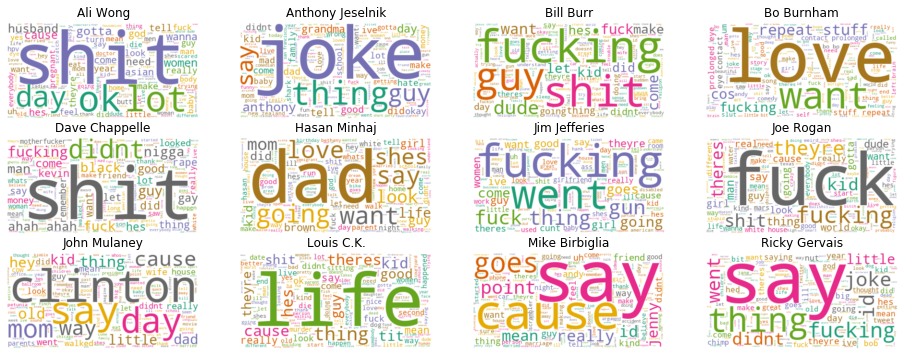

In [28]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

full_names = ['Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Bo Burnham', 'Dave Chappelle', 'Hasan Minhaj',
              'Jim Jefferies', 'Joe Rogan', 'John Mulaney', 'Louis C.K.', 'Mike Birbiglia', 'Ricky Gervais']

# Create subplots for each comedian
for index, comedian in enumerate(data.columns):
    wc.generate(data_clean.transcript[comedian])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()